In [329]:
'''Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton'''

# https://www.kaggle.com/competitions/titanic/leaderboard

'Variable\tDefinition\tKey\nsurvival\tSurvival\t0 = No, 1 = Yes\npclass\tTicket class\t1 = 1st, 2 = 2nd, 3 = 3rd\nsex\tSex\t\nAge\tAge in years\t\nsibsp\t# of siblings / spouses aboard the Titanic\t\nparch\t# of parents / children aboard the Titanic\t\nticket\tTicket number\t\nfare\tPassenger fare\t\ncabin\tCabin number\t\nembarked\tPort of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton'

In [330]:
import pandas as pd 
import matplotlib as plt

train = pd.read_csv('C:\\Users\\이슬희\\Downloads\\titanic\\train.csv')
test = pd.read_csv('C:\\Users\\이슬희\\Downloads\\titanic\\test.csv')
print(train.shape , test.shape)

display(train.head())
display(test.head())


# target = 'Survived' 

print(train.info() , test.info())
train.isnull().sum() ,test.isnull().sum()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [331]:
# null 

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

train = train.drop('Cabin' , axis=1)
test = test.drop('Cabin' , axis=1)

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().idxmax())
test['Fare'] = test['Fare'].fillna(test['Fare'].value_counts().median())

train.isnull().sum() ,test.isnull().sum()

train_PassengerId = train.pop('PassengerId')
test_PassengerId = test.pop('PassengerId' )


In [332]:
def adds0(add) : 
    if 'Mr' in add or 'mr' in add : 
        return 0 
    elif 'Miss' in add or 'miss' in add : 
        return 1
    elif 'Mrs' in add or 'mrs' in add  : 
        return 2
    else : 
        return 3

train['Name_i'] = train['Name'].apply(adds0)
test['Name_i'] = test['Name'].apply(adds0)


def far(add) : 
    if add <= 17 : 
        return 0 
    elif add <= 30 :
        return 1 
    elif add <=100 : 
        return 2
    else : 
        return 3
    

train['Fare'] = train['Fare'].apply(far) 
test['Fare'] = test['Fare'].apply(far) 


# 연령대 범주

def age(add) : 
    if add <= 16 : 
        return 0 
    elif add <= 26 :
        return 1 
    elif add <=36 : 
        return 2
    elif add <=62 :
        return 3 
    else : 
        return 4
    

train['age'] = train['Age'].apply(age) 
test['age'] = test['Age'].apply(age) 





In [333]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_i,age
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,2,C,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,2,S,0,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,0,S,3,2
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,1,S,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,1,S,1,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,1,C,0,1


생존자 중 여성의 성별이 많았을 것이다.
1등급일때 생존할 가능성이 높았을 것이다.
개인보다 단체(가족)일 떄 생존율이 높았을 것이다.
개인보다 단체(가족)일 떄 생존율이 높았을 것이다.
상대적으로 16살 이전 생존율이 높고, 나이가 많을 경우 생존율이 낮았을 것이다


c:\Python3.12\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python3.12\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


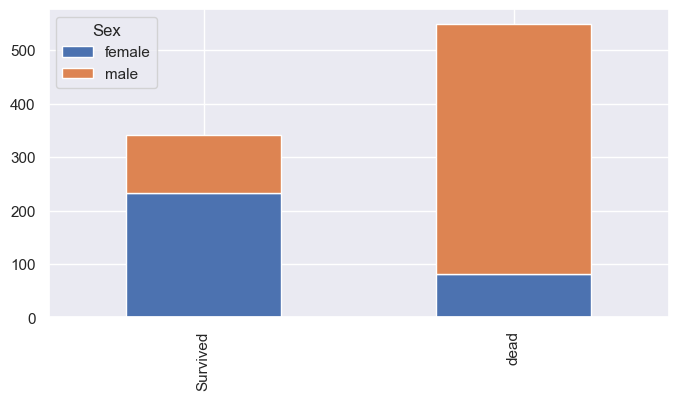

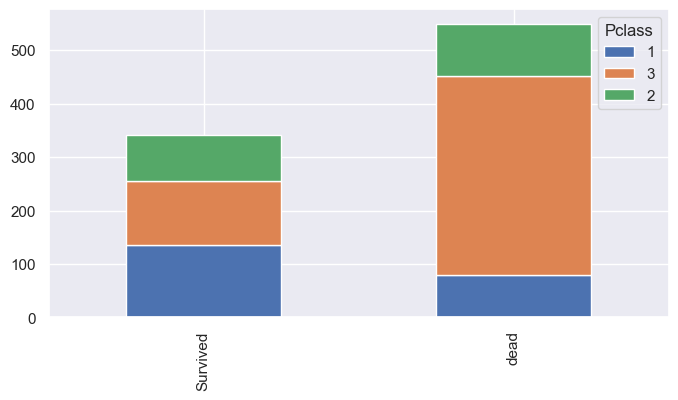

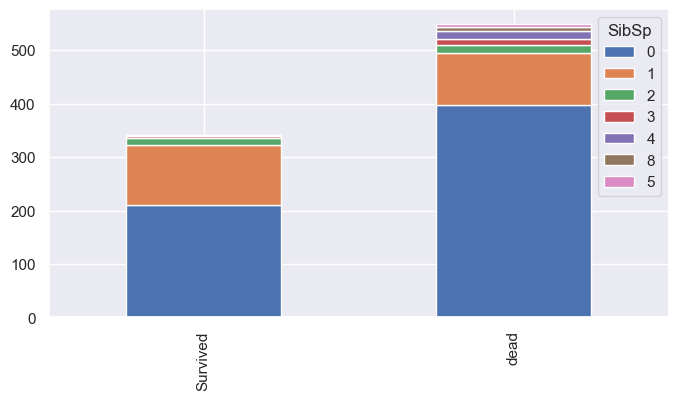

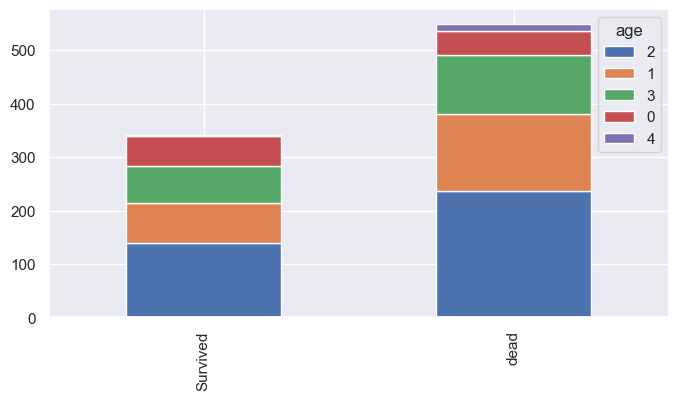

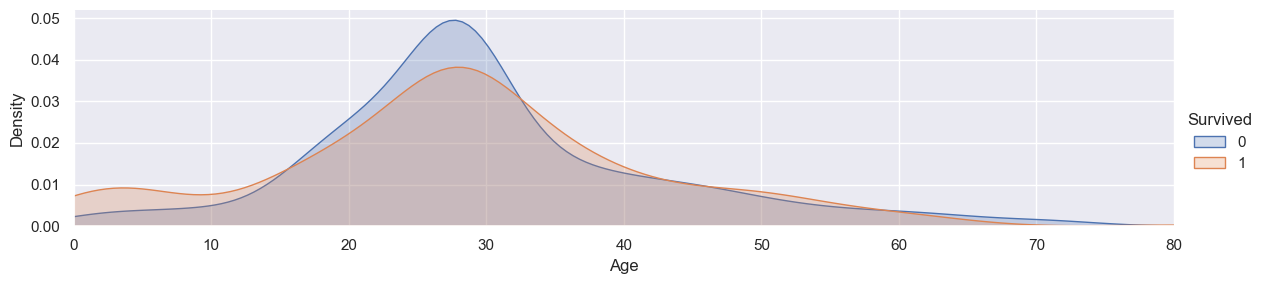

In [334]:
# Feature Engineering

import seaborn as sns
sns.set()

# EDA
def bar_polt(result):
    sur = train[train['Survived'] == 1][result].value_counts()
    dead = train[train['Survived'] == 0][result].value_counts()
    df = pd.DataFrame([sur,dead])
    df.index=['Survived','dead']
    df.plot(kind='bar',stacked=True, figsize=(8,4))
    
bar_polt('Sex')
print('생존자 중 여성의 성별이 많았을 것이다.') # 가설


bar_polt('Pclass')
print('1등급일때 생존할 가능성이 높았을 것이다.') # 가설


bar_polt('SibSp')
print('개인보다 단체(가족)일 떄 생존율이 높았을 것이다.') # 가설


bar_polt('age')
print('개인보다 단체(가족)일 떄 생존율이 높았을 것이다.') # 가설


fac = sns.FacetGrid(train, hue='Survived',aspect=4)
fac.map(sns.kdeplot, 'Age', shade=True)
fac.set(xlim=(0,train['Age'].max()))
fac.add_legend()

print('상대적으로 16살 이전 생존율이 높고, 나이가 많을 경우 생존율이 낮았을 것이다') # 가설


In [335]:
# Data Preprocessing
train.drop('Age', axis=1 , inplace=True)
test.drop('Age', axis=1 , inplace=True)
train = train.drop('Name' , axis=1)  
test = test.drop('Name' , axis=1) 

train =train.drop('Ticket' , axis=1) 
test =test.drop('Ticket' , axis=1) 

target = train.pop('Survived')




print(train.shape , test.shape)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape , test.shape)

(891, 8) (418, 8)
(891, 11) (418, 11)


In [336]:
# Validation Data Spli

from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(train, target , test_size=0.2 )
print(x_tr.shape, x_val.shape, y_tr.shape, y_val.shape)

(712, 11) (179, 11) (712,) (179,)


In [337]:
# Modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


kc = KNeighborsClassifier(n_neighbors=3)
kc.fit(x_tr, y_tr)
pred1= kc.predict(x_val)

rf = RandomForestClassifier()
rf.fit(x_tr, y_tr)
pred2=rf.predict(x_val)

dc = DecisionTreeClassifier()
dc.fit(x_tr, y_tr)
pred3=dc.predict(x_val)

gi = GaussianNB()
gi.fit(x_tr, y_tr)
pred4=gi.predict(x_val)

sv = SVC()
sv.fit(x_tr, y_tr)
pred5=sv.predict(x_val)


# # 평가
from sklearn.metrics import roc_auc_score
print(round(roc_auc_score(y_val, pred1)*100,2))
print(round(roc_auc_score(y_val, pred2)*100,2)) 
print(round(roc_auc_score(y_val, pred3)*100,2))
print(round(roc_auc_score(y_val, pred4)*100,2))
print(round(roc_auc_score(y_val, pred5)*100,2))# 선정

# 최종 

pred_f=sv.predict(test)

74.96
78.66
78.45
76.62
79.17


In [338]:
df = pd.DataFrame({'PassengerId': test_PassengerId, 
              'Survived' : pred_f})

df.to_csv('submission.csv', index=False)

